In [2]:
import matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import imshow
from numpy.random import randn
from pca_def import conv_pca,sph_pca

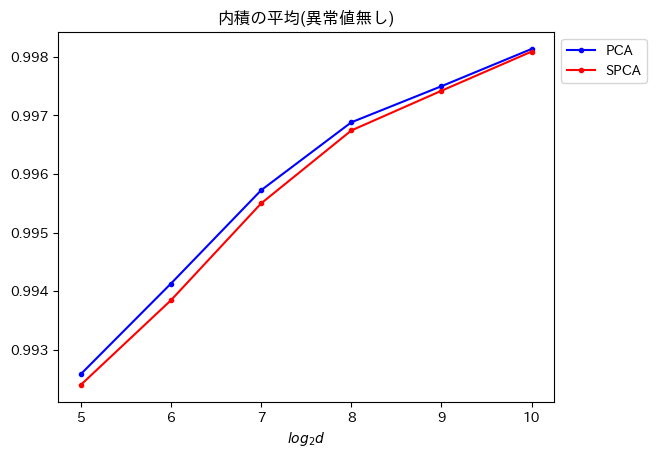

In [3]:
ite = 100
box_conv = np.zeros((ite,6))
box_sph = np.zeros((ite,6))
alpha1 = 7/5
alpha2 = 2/5
data_n = 20#メインのデータ数
out_n = 0#異常値の数

for dim in range(6):
    d  = 2**(dim + 5)
    alpha1 = 7/5
    alpha2 = 2/5

    sig1 = np.zeros(d)
    sig1[0:2] = np.array([d**alpha2,d**alpha1])
    sig1 = np.diag(sig1)
    sig2 = np.zeros((d,d))
    for i in range(d):
        for j in range(d):
            sig2[i,j] = 1/(np.abs(i - j) + 1)
    sigma1 = sig1 + sig2
    for it in range(ite):
        x1 = np.random.multivariate_normal(np.zeros(d),sigma1,data_n).T
        x2 = np.random.multivariate_normal(np.ones(d),2*d * np.identity(d),out_n).T
        X = np.concatenate([x1,x2],axis = 1)
        d,n = np.shape(X)
        lam1,vec1 = np.linalg.eigh(sigma1)
        sort1  = lam1.argsort()[::-1]
        lam1 = lam1[sort1]
        vec1 = (vec1.T[sort1]).T

        lam2,vec2  = conv_pca(X)
        lam3,vec3 = sph_pca(X)

        box_conv[it,dim] = np.abs(np.dot(vec1[:,0],vec2[:,0]))
        box_sph[it,dim] = np.abs(np.dot(vec1[:,0],vec3[:,0]))

plt.plot(np.arange(5,11),box_conv.mean(axis = 0),c = "b",marker = ".",label = "PCA")
plt.plot(np.arange(5,11),box_sph.mean(axis = 0),c = "r",marker = ".",label = "SPCA")
plt.xlabel("$log_2 d$")
plt.title("内積の平均(異常値無し)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

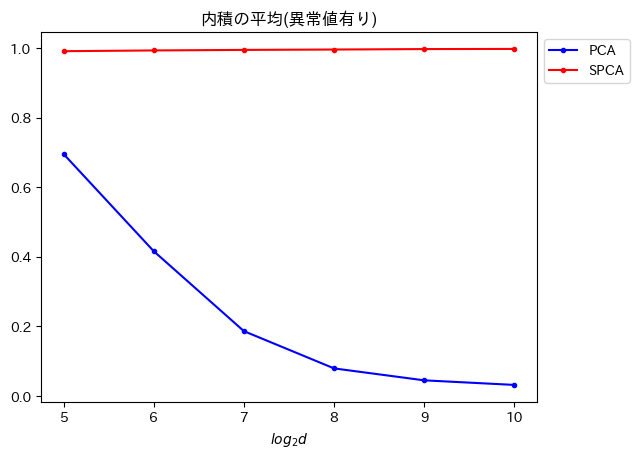

In [4]:
ite = 100
box_conv = np.zeros((ite,6))
box_sph = np.zeros((ite,6))
alpha1 = 7/5
alpha2 = 2/5
data_n = 20#メインのデータ数
out_n = 2#異常値の数

for dim in range(6):
    d  = 2**(dim + 5)
    alpha1 = 7/5
    alpha2 = 2/5

    sig1 = np.zeros(d)
    sig1[0:2] = np.array([d**alpha2,d**alpha1])
    sig1 = np.diag(sig1)
    sig2 = np.zeros((d,d))
    for i in range(d):
        for j in range(d):
            sig2[i,j] = 1/(np.abs(i - j) + 1)
    sigma1 = sig1 + sig2
    for it in range(ite):
        x1 = np.random.multivariate_normal(np.zeros(d),sigma1,data_n).T
        x2 = np.random.multivariate_normal(np.ones(d),2*d * np.identity(d),out_n).T
        X = np.concatenate([x1,x2],axis = 1)
        d,n = np.shape(X)
        lam1,vec1 = np.linalg.eigh(sigma1)
        sort1  = lam1.argsort()[::-1]
        lam1 = lam1[sort1]
        vec1 = (vec1.T[sort1]).T

        lam2,vec2  = conv_pca(X)
        lam3,vec3 = sph_pca(X)

        box_conv[it,dim] = np.abs(np.dot(vec1[:,0],vec2[:,0]))
        box_sph[it,dim] = np.abs(np.dot(vec1[:,0],vec3[:,0]))
plt.plot(np.arange(5,11),box_conv.mean(axis = 0),c = "b",marker = ".",label = "PCA")
plt.plot(np.arange(5,11),box_sph.mean(axis = 0),c = "r",marker = ".",label = "SPCA")
plt.xlabel("$log_2 d$")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("内積の平均(異常値有り)")
plt.show()